# Predicting house prices using multiple linear regression
We will use Boston house prices dataset to fit a multiple regression model that can be used to predict house
prices for new houses. Boston house price dataset is a well known and widely used dataset in machine learning.

## Description of Boston housing prices dataset
Boston area is divided into different towns or suburbs. For simplicity, we will call those regions. Every region has a number of houses. This dataset contains median house prices of 506 regions of Boston along with 13 features about those regions. Using this data our aim is to come up with a model that will map the input features to output as
accurately as possible. If such a model is found, we can predict the median house price of a new region using these features.
The features of the dataset (on which the house price is believed to be dependent) are:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* Acutal house price is stored with the name MEDV .
* MEDV - Median value of owner-occupied homes in $1000's

## Get data

As this is a well known dataset, it comes preloaded in many software packages. Boston house prices dataset is
available in sklearn library. So we will use that.

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston_house_prices = load_boston()

In [3]:
boston_house_prices.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Above cell shows how data is stored in `sklearn` packages. Data is stored in the form of a dictionary (a data
structure in Python). Data key stores the features, target key stores the target values, feature_names
key stores the feature names, `DESCR` key stores the description of dataset and filename key stores the file
name.

In [4]:
boston_house_prices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston_house_prices['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We will do a little processing on the data before doing regression. So we save the data in the form of a data
frame (another data structure).

In [6]:
import pandas as pd

In [7]:
data = pd.DataFrame(data = boston_house_prices.data, columns = boston_house_prices.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(data.shape)

(506, 13)


The above command shows the size of the dataset. There are 506 rows and 13 colulmns. Each column
corresponds to a feature and each row corresponds to a house. Now we will add another column to this dataset
that contains target values (i.e., house prices).

In [9]:
data['target'] = boston_house_prices.target
data.shape

(506, 14)

As expected, now there are 14 columns in the dataset.

From the description of dataset, it can be found that CHAS is a categorical variable. We will convert it into one
hot encoding (This is equivalent to creating dummy variables for categorical featuers).

In [10]:
dummy_columns = pd.get_dummies(data['CHAS'],prefix = "CHAS")
dummy_columns.head(7)

,CHAS_0.0,CHAS_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [11]:
data = data.drop("CHAS", axis = 1)
data = data.join(dummy_columns)
data.head(7)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,1,0
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,1,0


## Dividing the data into training and test set

If we build our model using all data available, our model might be a good fit for the given data. But for new data,
it will performs poorly while predicting median house price. Thus in practice, usually the data are divided into two parts.
One part is called training set, and another is called test set. Test data are always kept separate and are not used for
training. This way, test data acts as new data that the model has not previously seen. So the model's
performance on test data can roughly be considered to be its performance on new previously unseen data that the model is expected to encounter. So, regression model is built using training data and performance of the
model is tested on test data. In `sklern` there is a command to divide the data randomly into training and test set. The function is called `train_test_split` . It takes as argument the data we want to divide into two parts, and size of the test set. As the data are separated randomly, two different runs will produce two different splits. So for reproducibility,
we can set random_state to some number. Please keep in mind that both training and test data come from the
original data that we had at the beginning.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 5)

`pop` command removes the column form the dataset and assigns it to a new variable.

In [14]:
train_target = train_data.pop('target')
test_target = test_data.pop('target')

After popping the target column, the data contains only features.

## Whether to normalize the data or not?
If features are calculated in different units, data is normalized first before applying regression. However, we will
not normalize it.

Linear regression is in the linear_model class of `sklearn` library. So we have to first import it before using.

In [15]:
from sklearn.linear_model import LinearRegression

Instantiate the model. We can fit a model with or without intercept by choosing fit_intercept parameter
appropriately. We can also choose whether to normalize the data or not.

In [16]:
reg_model = LinearRegression(fit_intercept= True, normalize= False)

Train the model using trainng features and training target.

In [17]:
reg_model.fit(train_data, train_target) # Train data contains only features as target has been popped out.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that the model is fit, find its predictions on test features.

In [18]:
predictions = reg_model.predict(test_data) # Test data contains only features as target has been popped out.

## Visualizing predictions

We can plot the predictions of the model on test data to compare with the original house prices of the test data.
We will use `matplotlib` library for plotting.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

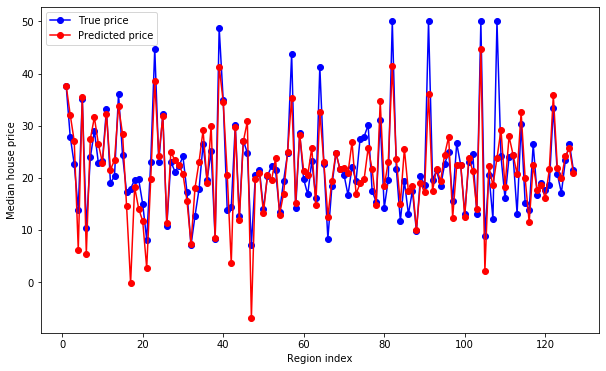

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,128),test_target, '-o', color = "blue", label = "True price")
plt.plot(np.arange(1,128),predictions, '-o', color = "red", label = "Predicted price")
plt.legend()
plt.xlabel("Region index")
plt.ylabel("Median house price")
plt.show()

On the x-axis we have plotted region number. As there are 127 regions in test dataset, x axis index varies from 1
to 127. On the y-axis we have predicted median house prices. Red colored points are actual prices and blue colored
points are predicted prices from our regression model. We can see that predictions are pretty close to actual
values.

Quantitatively we can calculate the measures of fit by using metrics like root mean square error (RMSE) or
other measures like $R^2$. We will only calculate RMSE.

## How to calculate RMSE
Definition of RMSE follows from its name itself.
* First calculate errors between actual values and predicted values.
* Square the erros and calculate mean value of it.
* Take square root of previously calculated mean value. That will give you RMSE. It has been calculated in the following cells using numpy package.

In [21]:
RMSE = np.sqrt(np.mean(np.square(predictions - test_target)))
RMSE

4.926926862831253